In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('../../data/현대_지역별수출실적.csv')

In [3]:
df

,국가,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,유럽-기타,2025,46,0,0,0,0,0,0,0,0,0,0,0
1,동유럽,2023,2535,3074,2598,3904,3768,3637,3578,3368,2604,3321,3165,2721
2,동유럽,2024,2373,3515,3637,3826,2186,2648,2140,2585,4095,4044,3273,2953
3,동유럽,2025,3025,0,0,0,0,0,0,0,0,0,0,0
4,북미-멕시코,2023,8,82,57,45,69,31,202,216,75,130,200,112
5,북미-멕시코,2024,60,51,287,373,194,150,143,146,189,153,121,72
6,북미-멕시코,2025,29,0,0,0,0,0,0,0,0,0,0,0
7,북미-미국,2023,33157,44040,44161,43894,51132,47682,46768,46840,49241,57589,58435,58183
8,북미-미국,2024,55421,43704,57669,63939,62068,55809,44859,52389,45941,52255,45782,57802
9,북미-미국,2025,41454,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df_melted = pd.melt(
    df,
    id_vars=["국가", "연도"],
    value_vars=[f"{m}월" for m in range(1, 13)],
    var_name="월",
    value_name="수출실적"
)

In [5]:
df_melted

,국가,연도,월,수출실적
0,유럽-기타,2025,1월,46
1,동유럽,2023,1월,2535
2,동유럽,2024,1월,2373
3,동유럽,2025,1월,3025
4,북미-멕시코,2023,1월,8
...,...,...,...,...
295,중남미,2024,12월,5599
296,중남미,2025,12월,0
297,중동·아프리카,2023,12월,8346
298,중동·아프리카,2024,12월,8388


In [6]:
# '월' 컬럼을 숫자로 변환하고 날짜 컬럼 생성
df_melted["월"] = df_melted["월"].str.replace("월", "").astype(int)
df_melted["날짜"] = pd.to_datetime(df_melted["연도"].astype(str) + "-" + df_melted["월"].astype(str).str.zfill(2) + "-01")


In [7]:
df_melted

,국가,연도,월,수출실적,날짜
0,유럽-기타,2025,1,46,2025-01-01
1,동유럽,2023,1,2535,2023-01-01
2,동유럽,2024,1,2373,2024-01-01
3,동유럽,2025,1,3025,2025-01-01
4,북미-멕시코,2023,1,8,2023-01-01
...,...,...,...,...,...
295,중남미,2024,12,5599,2024-12-01
296,중남미,2025,12,0,2025-12-01
297,중동·아프리카,2023,12,8346,2023-12-01
298,중동·아프리카,2024,12,8388,2024-12-01


In [8]:
# Prophet 입력 형식 컬럼명으로 변경
df_melted.rename(columns={"날짜": "ds", "수출실적": "y"}, inplace=True)

In [9]:
df_melted

,국가,연도,월,y,ds
0,유럽-기타,2025,1,46,2025-01-01
1,동유럽,2023,1,2535,2023-01-01
2,동유럽,2024,1,2373,2024-01-01
3,동유럽,2025,1,3025,2025-01-01
4,북미-멕시코,2023,1,8,2023-01-01
...,...,...,...,...,...
295,중남미,2024,12,5599,2024-12-01
296,중남미,2025,12,0,2025-12-01
297,중동·아프리카,2023,12,8346,2023-12-01
298,중동·아프리카,2024,12,8388,2024-12-01


In [10]:
df_melted = df_melted[df_melted["ds"] < pd.to_datetime("2025-02-01")]

In [11]:
df_melted['ds'].unique()

<DatetimeArray>
['2025-01-01 00:00:00', '2023-01-01 00:00:00', '2024-01-01 00:00:00',
 '2023-02-01 00:00:00', '2024-02-01 00:00:00', '2023-03-01 00:00:00',
 '2024-03-01 00:00:00', '2023-04-01 00:00:00', '2024-04-01 00:00:00',
 '2023-05-01 00:00:00', '2024-05-01 00:00:00', '2023-06-01 00:00:00',
 '2024-06-01 00:00:00', '2023-07-01 00:00:00', '2024-07-01 00:00:00',
 '2023-08-01 00:00:00', '2024-08-01 00:00:00', '2023-09-01 00:00:00',
 '2024-09-01 00:00:00', '2023-10-01 00:00:00', '2024-10-01 00:00:00',
 '2023-11-01 00:00:00', '2024-11-01 00:00:00', '2023-12-01 00:00:00',
 '2024-12-01 00:00:00']
Length: 25, dtype: datetime64[ns]

In [12]:
df_melted.to_csv('../../data/현대_지역별수출실적_melt.csv', index=False)

In [13]:
df=pd.read_csv('../../data/현대_지역별수출실적_melt.csv')

In [14]:
df['국가'].unique()

array(['유럽-기타', '동유럽', '북미-멕시코', '북미-미국', '북미-캐나다', '서유럽', '아시아', '중남미',
       '중동·아프리카'], dtype=object)

In [15]:
df

,국가,연도,월,y,ds
0,유럽-기타,2025,1,46,2025-01-01
1,동유럽,2023,1,2535,2023-01-01
2,동유럽,2024,1,2373,2024-01-01
3,동유럽,2025,1,3025,2025-01-01
4,북미-멕시코,2023,1,8,2023-01-01
...,...,...,...,...,...
196,아시아,2024,12,7324,2024-12-01
197,중남미,2023,12,4547,2023-12-01
198,중남미,2024,12,5599,2024-12-01
199,중동·아프리카,2023,12,8346,2023-12-01


In [16]:
df = df.sort_values(by="ds").reset_index(drop=True)

In [17]:
df

,국가,연도,월,y,ds
0,동유럽,2023,1,2535,2023-01-01
1,북미-멕시코,2023,1,8,2023-01-01
2,북미-미국,2023,1,33157,2023-01-01
3,중동·아프리카,2023,1,10427,2023-01-01
4,북미-캐나다,2023,1,9824,2023-01-01
...,...,...,...,...,...
196,북미-캐나다,2025,1,10472,2025-01-01
197,북미-미국,2025,1,41454,2025-01-01
198,북미-멕시코,2025,1,29,2025-01-01
199,동유럽,2025,1,3025,2025-01-01


In [18]:
df['국가'].unique()

array(['동유럽', '북미-멕시코', '북미-미국', '중동·아프리카', '북미-캐나다', '중남미', '서유럽', '아시아',
       '유럽-기타'], dtype=object)

16:10:39 - cmdstanpy - INFO - Chain [1] start processing


16:10:39 - cmdstanpy - INFO - Chain [1] done processing


[유럽-기타] 데이터 부족으로 스킵


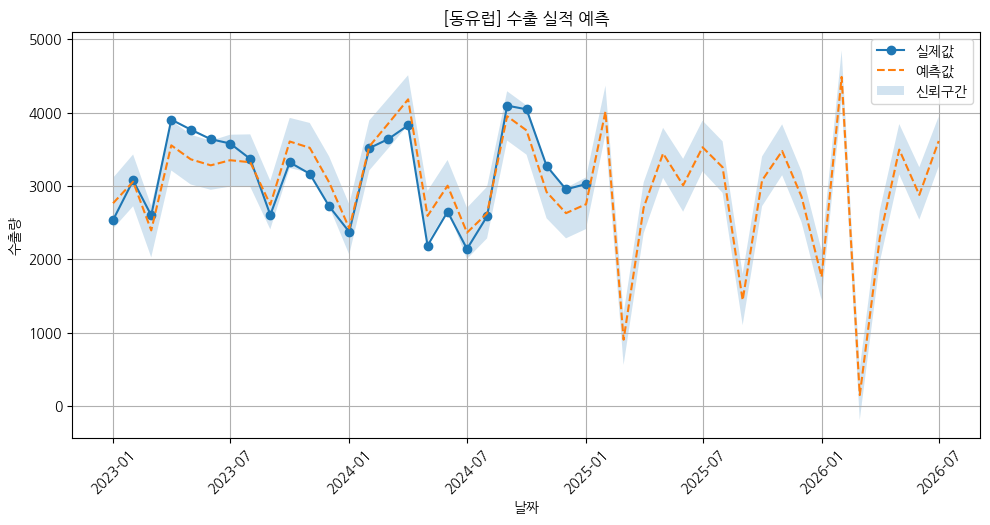

16:10:40 - cmdstanpy - INFO - Chain [1] start processing
16:10:40 - cmdstanpy - INFO - Chain [1] done processing


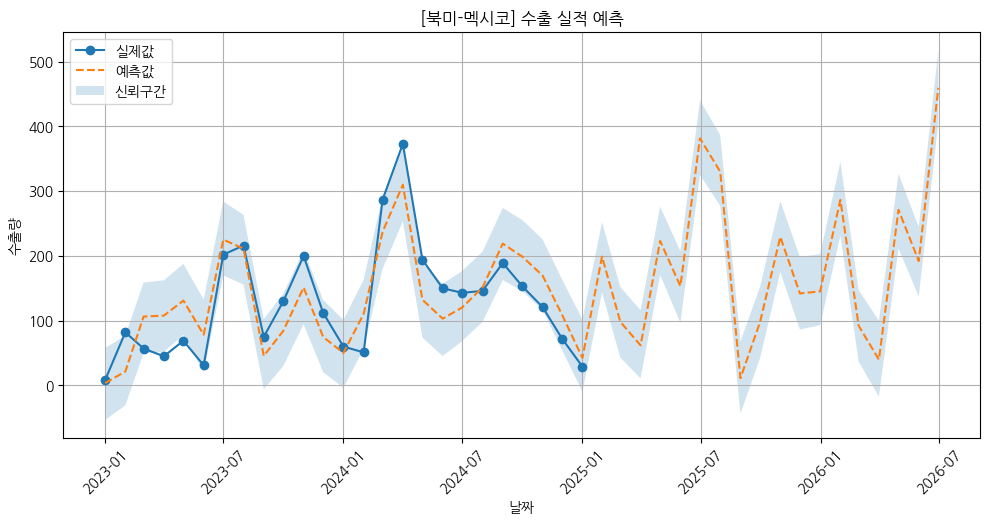

16:10:40 - cmdstanpy - INFO - Chain [1] start processing
16:10:40 - cmdstanpy - INFO - Chain [1] done processing


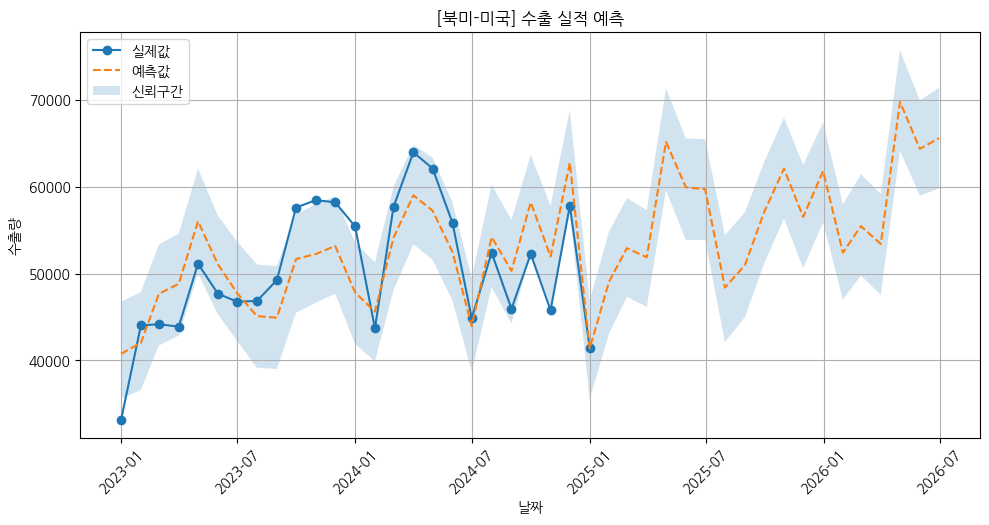

16:10:40 - cmdstanpy - INFO - Chain [1] start processing
16:10:40 - cmdstanpy - INFO - Chain [1] done processing


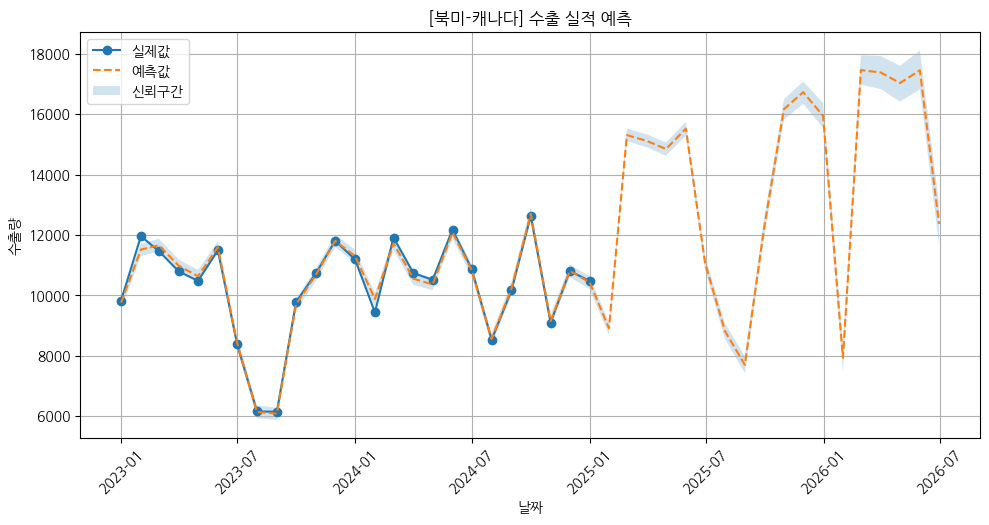

16:10:41 - cmdstanpy - INFO - Chain [1] start processing
16:10:41 - cmdstanpy - INFO - Chain [1] done processing


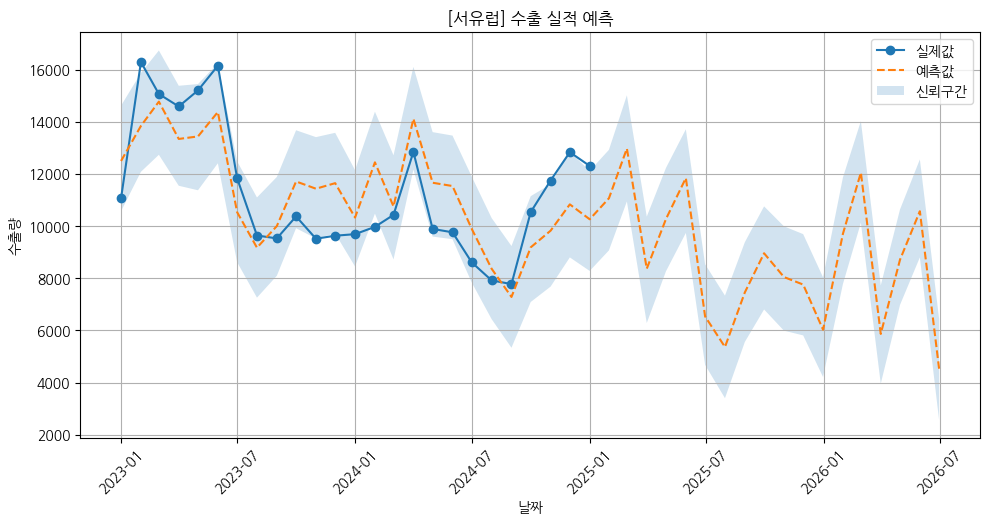

16:10:41 - cmdstanpy - INFO - Chain [1] start processing
16:10:41 - cmdstanpy - INFO - Chain [1] done processing


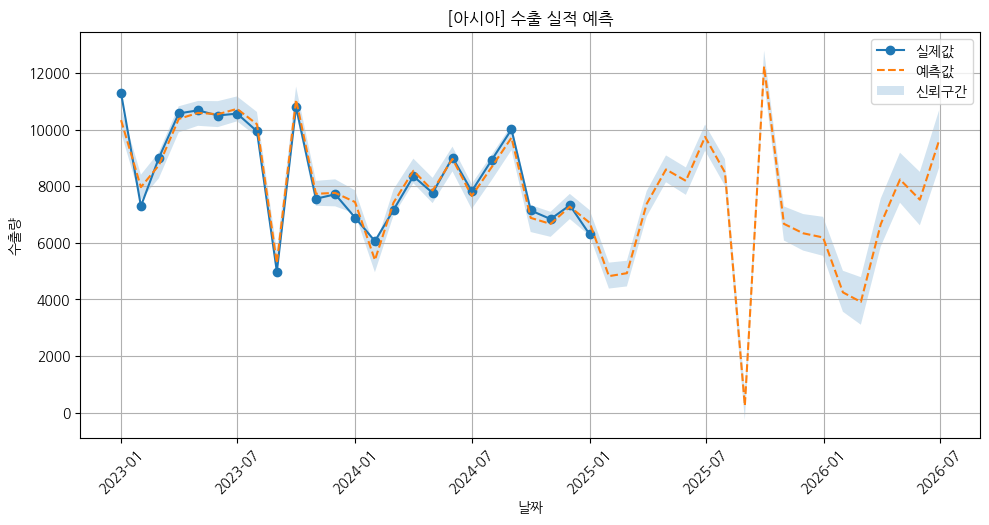

16:10:41 - cmdstanpy - INFO - Chain [1] start processing
16:10:41 - cmdstanpy - INFO - Chain [1] done processing


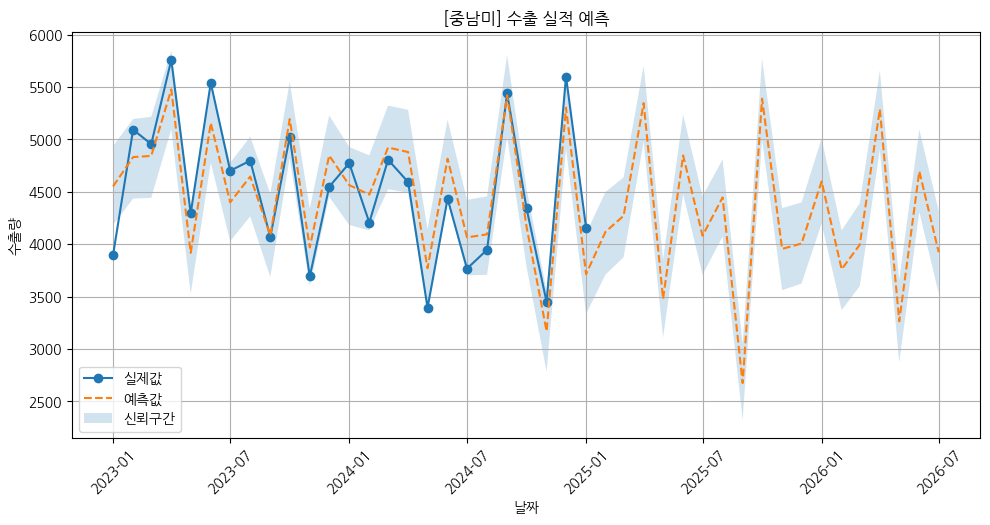

16:10:41 - cmdstanpy - INFO - Chain [1] start processing
16:10:47 - cmdstanpy - INFO - Chain [1] done processing


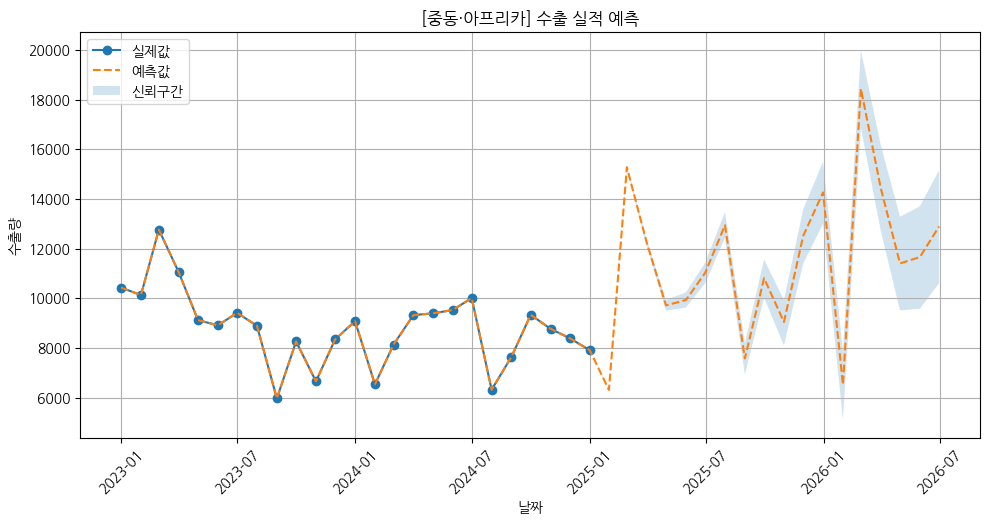

In [20]:
import os
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pickle

plt.rc('font', family='NanumGothic')

# 저장 폴더 없으면 생성
os.makedirs("models", exist_ok=True)

results = []

for country in df_melted["국가"].unique():
    df_country = df_melted[df_melted["국가"] == country][["ds", "y"]].copy()
    df_country = df_country.sort_values("ds").reset_index(drop=True)

    if len(df_country) < 12:
        print(f"[{country}] 데이터 부족으로 스킵")
        continue

    model = Prophet(daily_seasonality=False)
    model.fit(df_country)

    # 모델 저장
    with open(f"models/{country}_prophet.pkl", "wb") as f:
        pickle.dump(model, f)

    # 예측
    future = model.make_future_dataframe(periods=18, freq="ME")
    forecast = model.predict(future)

    # 병합 후 평가
    df_eval = pd.merge(df_country, forecast[["ds", "yhat"]], on="ds", how="inner")
    df_eval = df_eval[df_eval["y"] != 0]

    if len(df_eval) == 0:
        print(f"[{country}] 평가 불가 (y가 모두 0)")
        continue

    mae = mean_absolute_error(df_eval["y"], df_eval["yhat"])
    rmse = np.sqrt(mean_squared_error(df_eval["y"], df_eval["yhat"]))
    mape = (np.abs((df_eval["y"] - df_eval["yhat"]) / df_eval["y"])).mean() * 100

    results.append({
        "국가": country,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "MAPE": round(mape, 2)
    })

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(df_country["ds"], df_country["y"], label="실제값", marker='o')
    plt.plot(forecast["ds"], forecast["yhat"], label="예측값", linestyle="--")
    plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], alpha=0.2, label="신뢰구간")
    plt.title(f"[{country}] 수출 실적 예측")
    plt.xlabel("날짜")
    plt.ylabel("수출량")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.savefig(f"{country}_수출실적.png")
    plt.show()


In [17]:
df_seu = df_melted[df_melted["국가"] == "서유럽"].copy()
df_seu

,국가,연도,월,y,ds
156,서유럽,2023,1,11076,2023-01-01
157,서유럽,2023,2,16301,2023-02-01
158,서유럽,2023,3,15075,2023-03-01
159,서유럽,2023,4,14597,2023-04-01
160,서유럽,2023,5,15214,2023-05-01
161,서유럽,2023,6,16161,2023-06-01
162,서유럽,2023,7,11847,2023-07-01
163,서유럽,2023,8,9645,2023-08-01
164,서유럽,2023,9,9535,2023-09-01
165,서유럽,2023,10,10378,2023-10-01


In [21]:
df_results = pd.DataFrame(results)
display(df_results.sort_values("MAPE"))  # MAPE 기준 정렬
df_results.to_csv("../prophet_results.csv", index=False)


,국가,MAE,RMSE,MAPE
7,중동·아프리카,0.01,0.01,0.00
3,북미-캐나다,114.18,161.02,1.09
5,아시아,272.70,349.93,3.47
6,중남미,263.42,296.15,6.06
0,동유럽,239.47,269.80,7.80
2,북미-미국,4035.26,4511.25,8.07
4,서유럽,1371.53,1523.55,12.18
1,북미-멕시코,38.74,43.34,47.08


In [19]:
df_results.nsmallest(5, "MAPE")

,국가,MAE,RMSE,MAPE
7,중동·아프리카,0.03,0.04,0.00
3,북미-캐나다,112.76,168.16,1.06
5,아시아-기타,461.51,592.09,5.78
6,중남미,261.78,293.73,6.03
0,동유럽,239.73,270.37,7.82


In [1]:
# XGBoost

In [2]:
import pandas as pd

In [16]:
df=pd.read_csv('현대_시장구분별_수출실적111.csv')

In [17]:
df

,국가,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,기타,2025,46,0,0,0,0,0,0,0,0,0,0,0
1,동유럽,2023,2535,3074,2598,3904,3768,3637,3578,3368,2604,3321,3165,2721
2,동유럽,2024,2373,3515,3637,3826,2186,2648,2140,2585,4095,4044,3273,2953
3,동유럽,2025,3025,0,0,0,0,0,0,0,0,0,0,0
4,북미-멕시코,2023,8,82,57,45,69,31,202,216,75,130,200,112
5,북미-멕시코,2024,60,51,287,373,194,150,143,146,189,153,121,72
6,북미-멕시코,2025,29,0,0,0,0,0,0,0,0,0,0,0
7,북미-미국,2023,33157,44040,44161,43894,51132,47682,46768,46840,49241,57589,58435,58183
8,북미-미국,2024,55421,43704,57669,63939,62068,55809,44859,52389,45941,52255,45782,57802
9,북미-미국,2025,41454,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# 2. melt로 월 컬럼 녹이기
df_melted = df.melt(
    id_vars=["국가", "연도"],
    value_vars=["1월", "2월", "3월", "4월", "5월", "6월", "7월", "8월", "9월", "10월", "11월", "12월"],
    var_name="월",
    value_name="y"
)

# 3. 날짜 컬럼 만들기 (ds)
df_melted["월"] = df_melted["월"].str.replace("월", "").astype(int)
df_melted["ds"] = pd.to_datetime(df_melted["연도"].astype(str) + "-" + df_melted["월"].astype(str), format="%Y-%m")



# 4. 수치 변환 및 정리
df_melted["y"] = pd.to_numeric(df_melted["y"], errors="coerce")
df_melted = df_melted.dropna(subset=["y"]).sort_values(["국가", "ds"]).reset_index(drop=True)

cutoff_date = pd.to_datetime("2025-01-31")
df_melted = df_melted[df_melted["ds"] <= cutoff_date].copy()

In [19]:
df_melted[df_melted['국가']=='동유럽']

,국가,연도,월,y,ds
12,동유럽,2023,1,2535,2023-01-01
13,동유럽,2023,2,3074,2023-02-01
14,동유럽,2023,3,2598,2023-03-01
15,동유럽,2023,4,3904,2023-04-01
16,동유럽,2023,5,3768,2023-05-01
17,동유럽,2023,6,3637,2023-06-01
18,동유럽,2023,7,3578,2023-07-01
19,동유럽,2023,8,3368,2023-08-01
20,동유럽,2023,9,2604,2023-09-01
21,동유럽,2023,10,3321,2023-10-01


[기타] 데이터 부족으로 스킵
[동유럽] MAE: 864.74, RMSE: 944.21, MAPE: 29.87%


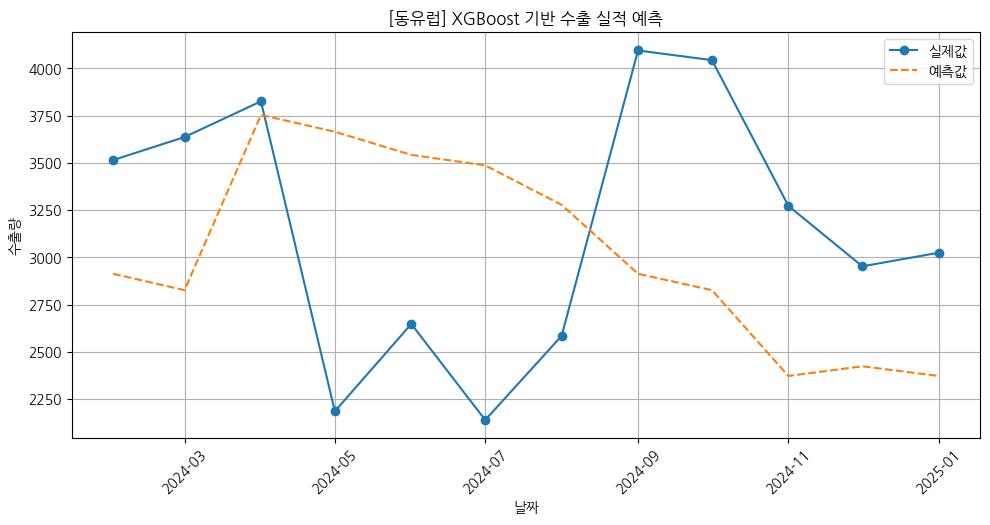

[북미-멕시코] MAE: 88.20, RMSE: 130.24, MAPE: 49.69%


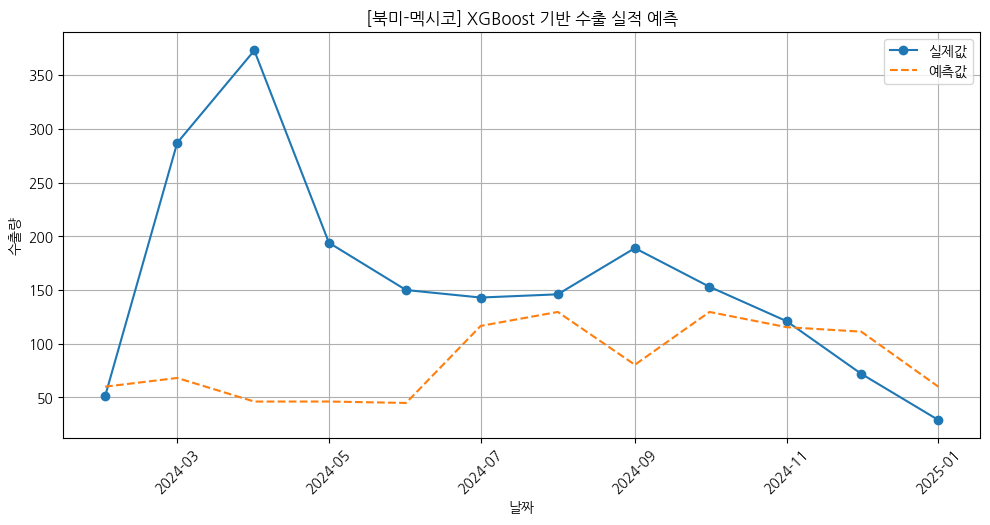

[북미-미국] MAE: 8706.46, RMSE: 10230.36, MAPE: 16.70%


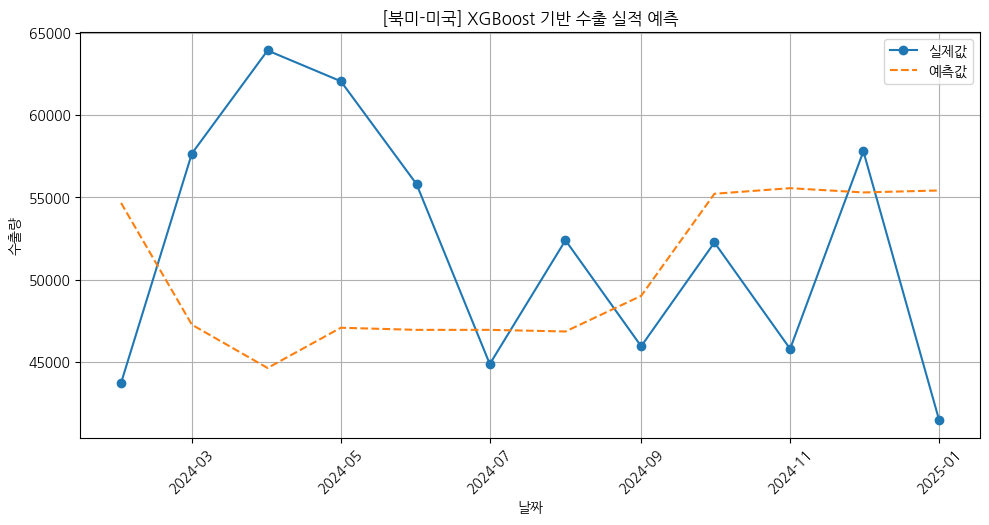

[북미-캐나다] MAE: 1477.10, RMSE: 1842.80, MAPE: 14.21%


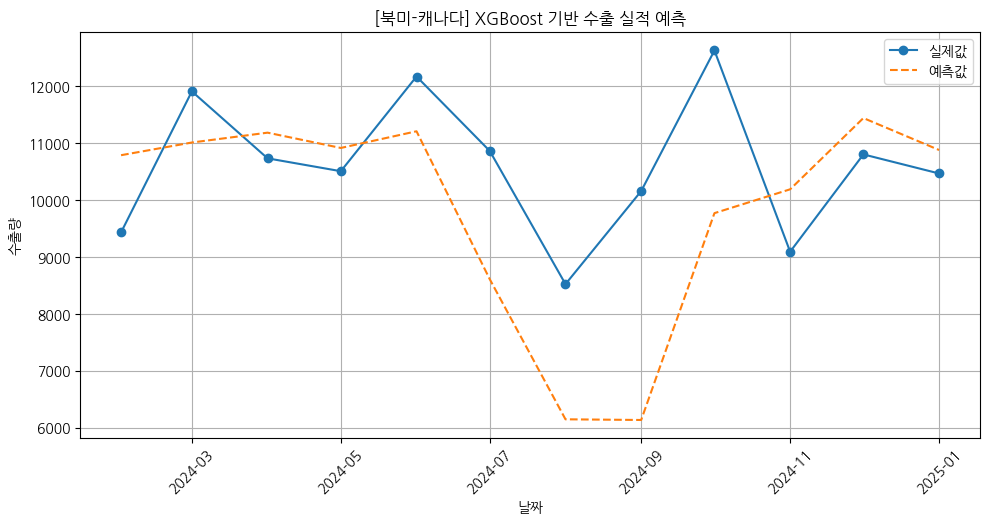

[서유럽] MAE: 1691.80, RMSE: 2009.58, MAPE: 16.18%


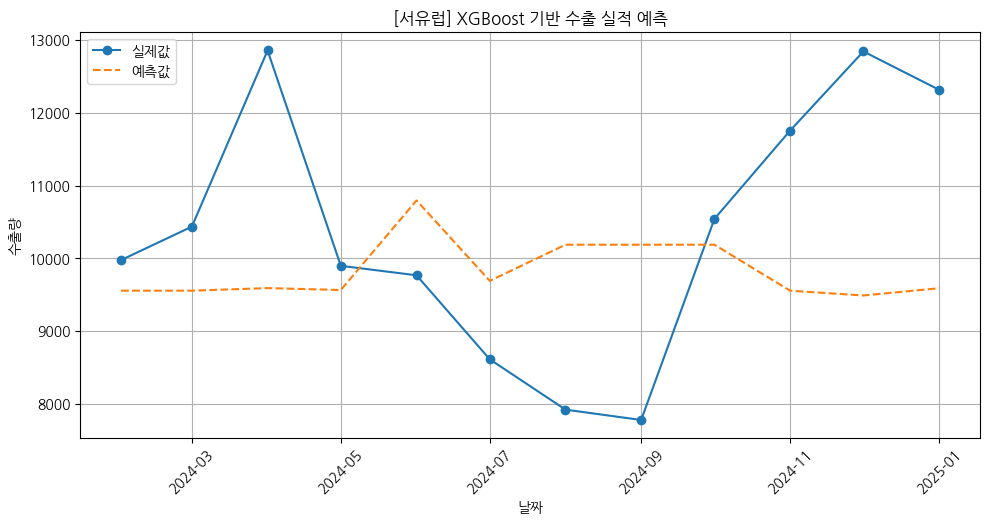

[아시아-기타] MAE: 2790.33, RMSE: 2959.14, MAPE: 37.37%


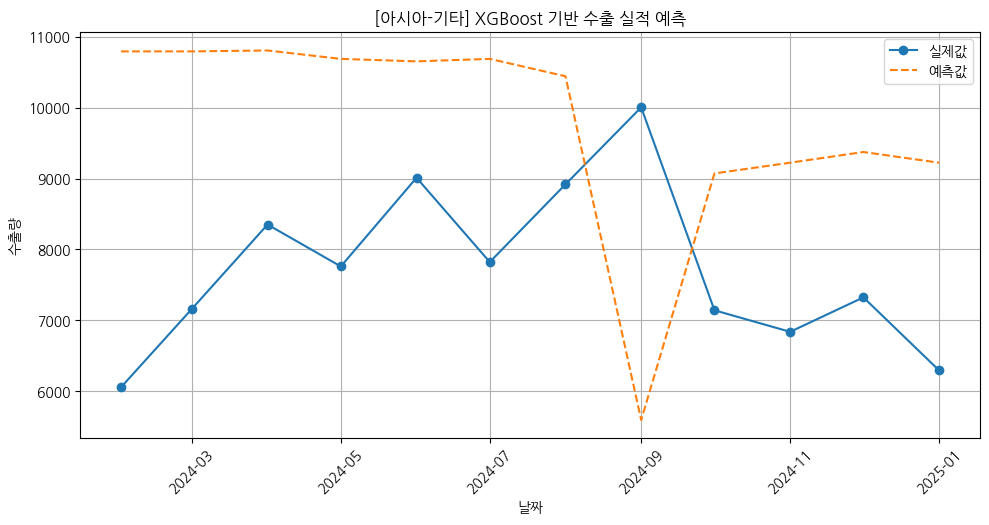

[중남미] MAE: 716.53, RMSE: 898.80, MAPE: 17.98%


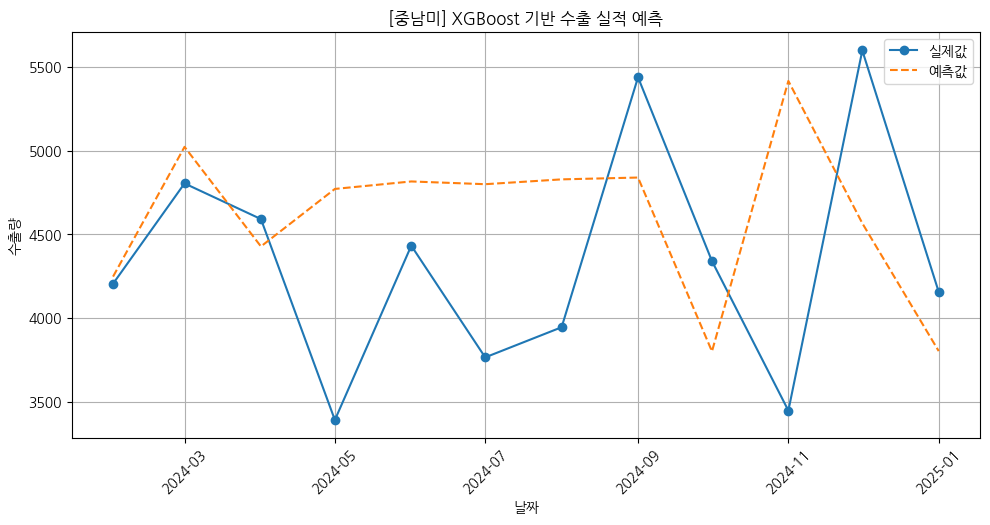

[중동·아프리카] MAE: 1420.07, RMSE: 1695.25, MAPE: 18.08%


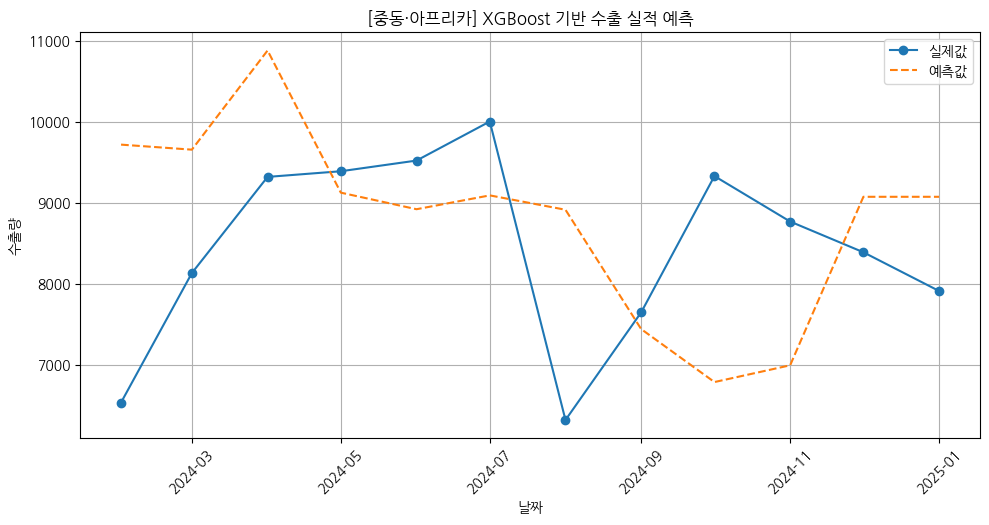

In [29]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')

# 결과 저장 리스트
results = []

# 국가별 루프
for country in df_melted["국가"].unique():
    df_country = df_melted[df_melted["국가"] == country][["ds", "y"]].copy()
    df_country = df_country.sort_values("ds").reset_index(drop=True)

    if len(df_country) < 15:  # 최소 데이터 수 제한
        print(f"[{country}] 데이터 부족으로 스킵")
        continue

    # 날짜 특성 생성
    df_country["year"] = df_country["ds"].dt.year
    df_country["month"] = df_country["ds"].dt.month
    df_country["is_month_start"] = df_country["ds"].dt.is_month_start.astype(int)
    df_country["is_month_end"] = df_country["ds"].dt.is_month_end.astype(int)

    df_country["month_sin"] = np.sin(2 * np.pi * df_country["month"] / 12)
    df_country["month_cos"] = np.cos(2 * np.pi * df_country["month"] / 12)

    # 시차(lag) 변수 생성
    for lag in [1, 2, 3]:
        df_country[f"lag_{lag}"] = df_country["y"].shift(lag)
        # lag1 - 바로 전달의 판매량 / lag2 - 2달 전 판매량 / lag3 - 3달 전 판매량

    df_country = df_country.dropna().reset_index(drop=True)

    # train/test 분리
    train = df_country.iloc[:-12]
    test = df_country.iloc[-12:]

    # ✅ 새 feature 컬럼
    feature_cols = [
    "year", "is_month_start", "is_month_end",
    "month_sin", "month_cos",
    "lag_1", "lag_2", "lag_3"
    ]

    X_train = train[feature_cols]
    y_train = train["y"]
    X_test = test[feature_cols]
    y_test = test["y"]

    # 모델 학습
    model = XGBRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)

    # 평가
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = (np.abs((y_test - y_pred) / y_test)).mean() * 100

    print(f"[{country}] MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

    # 결과 저장
    results.append({
        "국가": country,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "MAPE": round(mape, 2)
    })

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(test["ds"], y_test.values, label="실제값", marker='o')
    plt.plot(test["ds"], y_pred, label="예측값", linestyle="--")
    plt.title(f"[{country}] XGBoost 기반 수출 실적 예측")
    plt.xlabel("날짜")
    plt.ylabel("수출량")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.savefig(f"{country}_XGB_수출실적.png")
    plt.show()


In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

plt.rc('font', family='NanumGothic')

# 모델 저장 폴더
os.makedirs("models", exist_ok=True)

results = []

for country in df_melted["국가"].unique():
    df_country = df_melted[df_melted["국가"] == country][["ds", "y"]].copy()

    if len(df_country) < 12:
        print(f"[{country}] 데이터 부족으로 스킵")
        continue

    model = Prophet(daily_seasonality=False)
    model.fit(df_country)

    # 모델 저장
    with open(f"models/{country}_prophet.pkl", "wb") as f:
        pickle.dump(model, f)

    # 예측 결과 저장용 (원하는 경우)
    future = model.make_future_dataframe(periods=12, freq="ME")
    forecast = model.predict(future)

    df_eval = pd.merge(df_country, forecast[["ds", "yhat"]], on="ds", how="inner")
    df_eval = df_eval[df_eval["y"] != 0]

    if len(df_eval) == 0:
        continue

    mae = mean_absolute_error(df_eval["y"], df_eval["yhat"])
    rmse = np.sqrt(mean_squared_error(df_eval["y"], df_eval["yhat"]))
    mape = (np.abs((df_eval["y"] - df_eval["yhat"]) / df_eval["y"])).mean() * 100

    results.append({
        "국가": country,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "MAPE": round(mape, 2)
    })

print("모델 저장 완료")


14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing


[기타] 데이터 부족으로 스킵


14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing
14:32:22 - cmdstanpy - INFO - Chain [1] start processing
14:32:22 - cmdstanpy - INFO - Chain [1] done processing


모델 저장 완료
